# AI Worksheet Week 23

### Problem 3

Implement an evolutionary algorithm to solve the Ackley function.

$$f(\textbf{x}) = - a \cdot \mathrm{exp} \left( -b \sqrt{ \frac{1}{d} \sum_{i=1}^d x_i^2} \right) - \mathrm{exp} \left( \frac{1}{d} \sum_{i=1}^d \cos (cx_i) \right) + a + \mathrm{exp}(1)$$

In [26]:
from math import *
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [27]:
# Function to calculate fitness of an individual

def calculate_fitness(a, b, c, d, x, y):
    return -a * exp(-b * sqrt(1/d * (x**2 + y**2))) - exp(1/d * (cos(c*x)+cos(c*y))) + a + e


# Function to generate population

def generate_population(size, x_limits, y_limits):

    # List of individuals in population
    population = []

    # Each individual of form: individual = [x, y, fitness]
    for i in range(size):
        x = random.uniform(x_limits[0], x_limits[1])
        y = random.uniform(x_limits[0], x_limits[1])
        fitness = calculate_fitness(a, b, c, d, x, y)
        individual = [x, y, fitness]
        population.append(individual)
    
    return population

In [28]:
# Function for parent selection using fitness proportionate selection (roulette wheel selection)

def fitness_proportionate_selection(population):

    fitnesses = np.array([individual[2] for individual in population])

    # Adjust for negative fitnesses
    lowest_fitness = min(fitnesses)
    if lowest_fitness < 0:
        fitnesses -= lowest_fitness
    
    fitnesses /= np.sum(fitnesses)

    # Spin roulette wheel
    roulette_selection = np.random.choice(a=range(len(fitnesses)), p=fitnesses)

    return population[roulette_selection]


In [29]:
# Function to perform crossover between two parents
def crossover(parent_a, parent_b): 
    xa = parent_a[0]
    ya = parent_a[1]
    xb = parent_b[0]
    yb = parent_b[1]
    return [(xa + xb) / 2, (ya + yb) / 2, 0]


# Function to perform random mutation
def mutate(individual):
    new_x = individual[0] + random.normal(0, 1)
    new_y = individual[1] + random.normal(0, 1) 
    lower_limit, upper_limit = (-20, 20)
    # Making sure we don’t go outside bounds
    new_x = min(max(new_x, lower_limit), upper_limit)
    new_y = min(max(new_y, lower_limit), upper_limit)
    return [new_x, new_y , calculate_fitness(a,b,c,d,new_x,new_y)]

In [30]:
# Function to make new generation. Add all children to parents and sort all individuals by fitness. Top p solutions are taken to next generation.

def make_next_generation(old_population):

    new_population = []
    population_size = len(old_population)

    for i in range(population_size):
        parent_one = fitness_proportionate_selection(old_population)
        parent_two = fitness_proportionate_selection(old_population)

        # 100% chance of crossover here!
        individual = crossover(parent_one, parent_two)

        # small chance of mutation
        if random.uniform(0,1) < 0.2:
            individual = mutate(individual)

        new_population.append(individual)
        temp_population = old_population + new_population
        sorted_temp_population = sorted(temp_population, reverse = True, key=lambda x: x[2])
        new_population = sorted_temp_population[:population_size]
        return new_population

GENERATION: 1
current best solution:  [3.3666879739591407, 3.217626631970382, 11.575105180773239]
GENERATION: 2
current best solution:  [3.3666879739591407, 3.217626631970382, 11.575105180773239]
GENERATION: 3
current best solution:  [3.3666879739591407, 3.217626631970382, 11.575105180773239]
GENERATION: 4
current best solution:  [3.3666879739591407, 3.217626631970382, 11.575105180773239]
GENERATION: 5
current best solution:  [3.3666879739591407, 3.217626631970382, 11.575105180773239]
GENERATION: 6
current best solution:  [3.3666879739591407, 3.217626631970382, 11.575105180773239]
GENERATION: 7
current best solution:  [3.3666879739591407, 3.217626631970382, 11.575105180773239]
GENERATION: 8
current best solution:  [3.3666879739591407, 3.217626631970382, 11.575105180773239]
GENERATION: 9
current best solution:  [3.3666879739591407, 3.217626631970382, 11.575105180773239]
GENERATION: 10
final best solution:  [3.3666879739591407, 3.217626631970382, 11.575105180773239]
GENERATION: 1
current

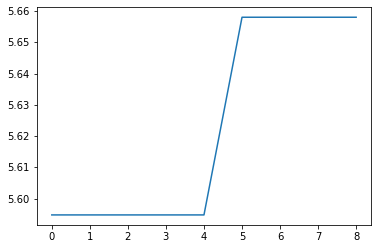

In [31]:
a = 20
b = 0.2
c = 2*pi
d = 2

runs = 5
generations = 10

fitness_per_run = []
for j in range(runs):
    population = generate_population(size=10, x_limits=(-4, 4), y_limits=(-4, 4))

    best_in_gen = [] 
    i=1
    while True:
        print("GENERATION: " + str(i))
        if i == generations:
            break
        i += 1
        population = make_next_generation(population)
        best_individual_in_generation = sorted(population, key=lambda x: x[2])[9]
        print('current best solution: ', best_individual_in_generation)
        best_in_gen.append(best_individual_in_generation[2])

    best_individual = sorted(population, key=lambda x: x[2])[9]
    fitness_per_run.append(best_in_gen)
    print('final best solution: ', best_individual)

fit_per_run = np.array(fitness_per_run)
plt.plot(np.sum(fit_per_run, axis=0)/10)